In [186]:
%reload_ext autoreload
%autoreload 2
from ellipsoid_mirror import *

plt.rcParams['font.size'] = 18
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15

## Gaussian beam

ビームウェスト $w_0$ とビームウェストからの距離 $z$ からビームサイズ $w$ と曲率半径 $R$ を求める式は、
$$
\begin{align}
w(z) &= w_0 \sqrt{1 + \left(\frac{z}{z_c}\right)^2} \\
R(z) &= z\left(1 + \frac{z}{z_c}\right)^2 \\
\\
z_c &\equiv \frac{\pi w_0^2}{\lambda}
\end{align}
$$

逆にビームサイズ $w$ と曲率半径 $R$ からビームウェスト $w_0$ とビームウェストからの距離 $z$ を求める式は、
$$
\begin{align}
w_0 &= \frac{w}{\sqrt{1 + \left(\frac{\pi w^2}{\lambda R}\right)^2}} \\
z &= \frac{R}{1 + \left(\frac{\pi w^2}{\lambda R}\right)^{-2}} \\
\end{align}
$$

In [22]:
def plot_beamwaist(w0=5*mm, zmax=100*cm, freq=200*GHz):
    wavelength = calc_wavelength(freq)
    
    z_list = np.linspace(0., zmax, 1000)
    w_list = calc_beamwaist(z_list, w0, wavelength)
    
    fig, axs = plt.subplots(1, 1, figsize=(12,4))
    axs.plot(z_list/cm, w_list/cm)
    axs.set_xlabel('Distance $z$ [cm]')
    axs.set_ylabel('Beam waist $w$ [cm]')
    axs.grid(True)
    
    fig.tight_layout()
    
    return 0

def plot_R(w0=5*mm, zmax=100*cm, freq=200*GHz):
    wavelength = calc_wavelength(freq)
    
    z_list = np.linspace(0., zmax, 1000)
    R_list = calc_R(z_list, w0, wavelength)
    
    fig, axs = plt.subplots(1, 1, figsize=(12,4))
    axs.plot(z_list/cm, R_list/cm)
    axs.set_xlabel('Distance $z$ [cm]')
    axs.set_ylabel('Beam radius $R$ [cm]')
    axs.grid(True)
    
    fig.tight_layout()
    
    return 0


/data/analysis/adachi/analysis/Optics/ellipsoid_mirror.py:187: RuntimeWarning: divide by zero encountered in true_divide
  return z + z_c * z_c / z


0

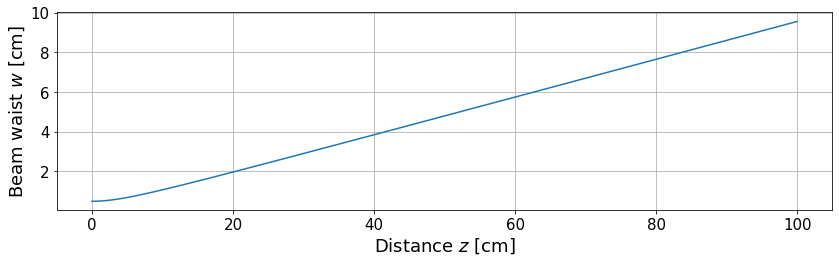

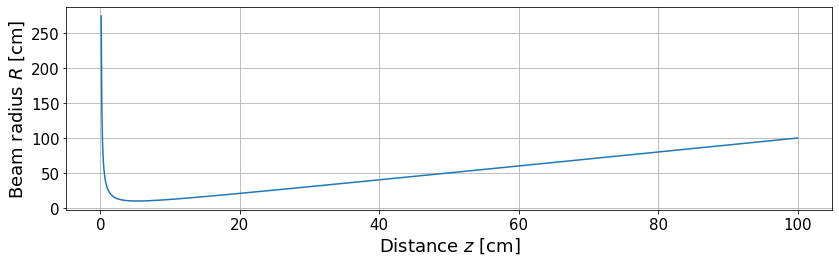

In [23]:
plot_beamwaist(w0=5*mm, zmax=100*cm, freq=200*GHz)
plot_R(w0=5*mm, zmax=100*cm, freq=200*GHz)

0

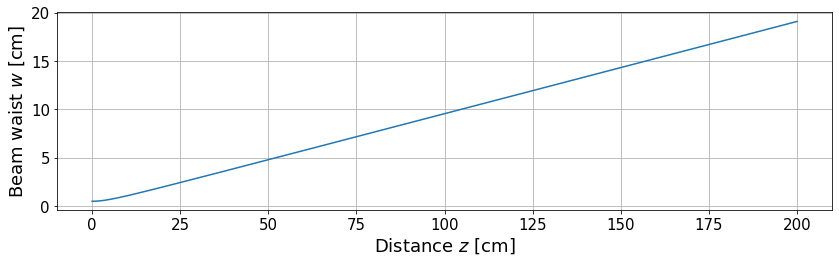

In [27]:
plot_beamwaist(w0=5*mm, zmax=200*cm, freq=200*GHz)

0

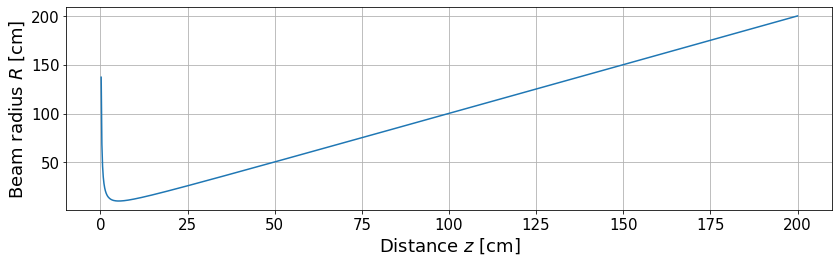

In [28]:
plot_R(w0=5*mm, zmax=200*cm, freq=200*GHz)

In [32]:
### w_out = 150 mm
calc_R1R2d2(w_in=3*mm, w_out=150*mm, d1=150*cm, verbose=1)

wavelength = 1.5 mm
w_in = 3.0 mm
w_out = 150.0 mm
m = 50.0 
d1/z_c = 79.5
z_c = 18.9 mm
f0 = 943.1 mm
R1 = 150.0 cm
d1 = 150.0 cm
f0 = 94.3 cm
f_p = 152.4 cm
f_m = 147.7 cm
R2_p = -9645.3 cm
R2_m = 9645.3 cm
d2_p = 6137.6 cm
d2_m = -5537.3 cm
d2_R2p_p from R2_p = -3812.5 cm
d2_R2m_p from R2_m = 5832.8 cm
d2_R2p_m from R2_p = -5832.8 cm
d2_R2m_m from R2_m = 3812.5 cm
R2 calculated from d2_p = 97607.31409524789 mm
R2 calculated from d2_m = -95532.34955919399 mm


((1.5, 61.37585747066144, 61.37585747066144),
 (1.5, -55.373456510276974, -55.373456510276974))

/data/analysis/adachi/analysis/Optics/ellipsoid_mirror.py:67: RuntimeWarning: invalid value encountered in sqrt
  f2 = np.sqrt( 1. - alpha*(1. + (z_c/d1)**2.) )


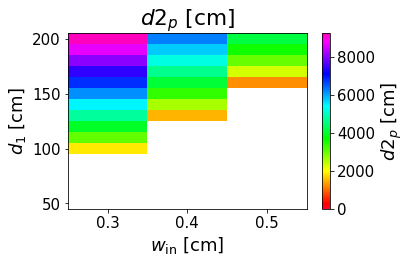

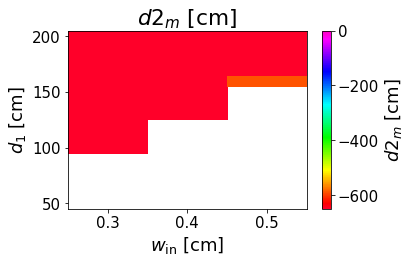

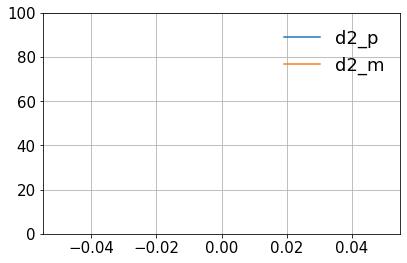

0

In [51]:
scan(
    w_in_min=3*mm, w_in_max=5*mm, w_in_scan=1*mm,
    d1_min=50*cm, d1_max=200*cm, d1_scan=10*cm, w_out = 150*mm
)

In [44]:
calc_R1R2d2(w_in=3*mm, w_out=150*mm, d1=100*cm, verbose=1)

wavelength = 1.5 mm
w_in = 3.0 mm
w_out = 150.0 mm
m = 50.0 
d1/z_c = 53.0
z_c = 18.9 mm
f0 = 943.1 mm
R1 = 100.0 cm
d1 = 100.0 cm
f0 = 94.3 cm
f_p = 100.7 cm
f_m = 99.4 cm
R2_p = -15022.2 cm
R2_m = 15022.2 cm
d2_p = 1866.2 cm
d2_m = -1466.0 cm
d2_R2p_p from R2_p = -1664.8 cm
d2_R2m_p from R2_m = 13357.5 cm
d2_R2p_m from R2_p = -13357.5 cm
d2_R2m_m from R2_m = 1664.8 cm
R2 calculated from d2_p = 137820.3805111826 mm
R2 calculated from d2_m = -166343.34773350987 mm


{'d1': 1.0,
 'R1': 1.0003557978748392,
 'R2_p': -150.22246535082388,
 'R2_m': 150.22246535082414,
 'd2_p': 18.662030057264438,
 'd2_m': -14.660429417009494}

/data/analysis/adachi/analysis/Optics/ellipsoid_mirror.py:67: RuntimeWarning: invalid value encountered in sqrt
  f2 = np.sqrt( 1. - alpha*(1. + (z_c/d1)**2.) )


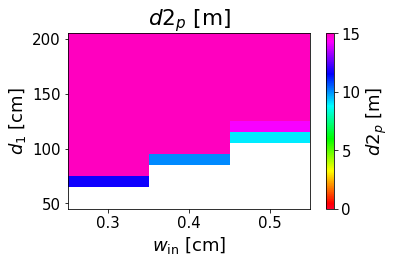

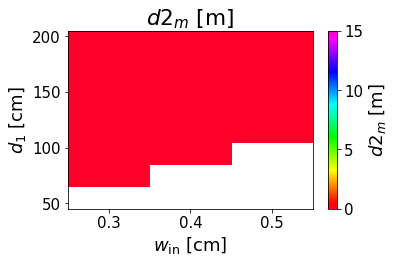

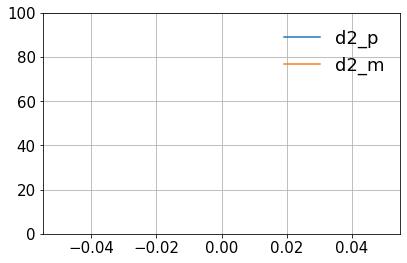

0

In [59]:
scan(
    w_in_min=3*mm, w_in_max=5*mm, w_in_scan=1*mm,
    d1_min=50*cm, d1_max=200*cm, d1_scan=10*cm, w_out = 100*mm
)

In [136]:
calc_R1R2d2(w_in=3*mm, w_out=100*mm, d1=63*cm, verbose=1)
print('')
print('########################')
print('')
calc_R1R2d2(w_in=3*mm, w_out=100*mm, d1=62.9*cm, verbose=1)

wavelength = 1.5 mm
w_in = 3.0 mm
w_out = 100.0 mm
m = 33.333333333333336 
d1/z_c = 33.4
z_c = 18.9 mm
f0 = 628.8 mm
R1 = 63.1 cm
d1 = 63.0 cm
f0 = 62.9 cm
f_p = 63.2 cm
f_m = 62.9 cm
R2_p = -30182.4 cm
R2_m = 30182.4 cm
d2_p = 2.7 m
d2_m = -0.2 m
d2_R2p_p from R2_p = -1.5 m
d2_R2m_p from R2_m = 300.4 m
d2_R2p_m from R2_p = -300.4 m
d2_R2m_m from R2_m = 1.5 m
R2 calculated from d2_p = 163850.47756082282 mm
R2 calculated from d2_m = -2154186.952269071 mm

########################

wavelength = 1.5 mm
w_in = 3.0 mm
w_out = 100.0 mm
m = 33.333333333333336 
d1/z_c = 33.3
z_c = 18.9 mm
f0 = 628.8 mm
R1 = 63.0 cm
d1 = 62.9 cm
f0 = 62.9 cm
f_p = 63.0 cm
f_m = 62.9 cm
R2_p = -51155.2 cm
R2_m = 51155.2 cm
d2_p = 2.1 m
d2_m = 0.4 m
d2_R2p_p from R2_p = -0.9 m
d2_R2m_p from R2_m = 510.7 m
d2_R2p_m from R2_p = -510.7 m
d2_R2m_m from R2_m = 0.9 m
R2 calculated from d2_p = 209238.89110468767 mm
R2 calculated from d2_m = 1105546.8837698111 mm


{'d1': 0.629,
 'R1': 0.6295656563987905,
 'R2_p': -511.55236806221933,
 'R2_m': 511.5523680622633,
 'd2_p': 2.120802868277663,
 'd2_m': 0.3974635715097664}

## Ellipse drawing

In [119]:
def ellipse(a=2.5, b=1.5):
    e = np.sqrt(a**2 - b**2) / a
    theta = np.linspace(0, 2*np.pi, 129)
    
    x = a * np.cos(theta)
    y = b * np.sin(theta)

    return x, y

def plot_ellipse(x, y):
    fig, ax = plt.subplots(1, 1, figsize=(6, 6))
    ax.grid()
    ax.set_aspect('equal')
    ax.set_title(f'Ellipse', fontsize=16)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.plot(x, y, c='red')
    return 0

#def distance(x1, y1, x2, y2):
#    return np.sqrt( np.power(x1-x2, 2.) + np.power(y1-y2, 2.) )

def calc_ellipseR1R2cos(x, y, a, b, verbose=0):
    focal = np.sqrt(a**2 - b**2)
    
    R1_vec = np.array([x-focal, y-0])
    R2_vec = np.array([x+focal, y-0])
    if verbose > 0: print(R1_vec.shape)
    
    R1 = np.sqrt(np.power(R1_vec[0], 2.) + np.power(R1_vec[1], 2.))
    R2 = np.sqrt(np.power(R2_vec[0], 2.) + np.power(R2_vec[1], 2.))
    
    R1dotR2 = np.multiply(R1_vec, R2_vec)
    R1dotR2 = np.sum(R1dotR2, axis=0)
    if verbose > 0: print(R1dotR2.shape)
    
    cos = R1dotR2 / (R1*R2)
    
    return R1, R2, cos

def calc_ellipseCos(a, b, R1, R2):
    return 2*b*b / (R1*R2) - 1.


0

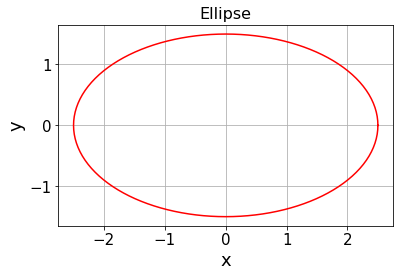

In [112]:
a = 2.5
b = 1.5
x, y = ellipse(a=a, b=b)
plot_ellipse(x, y)

In [114]:
R1, R2, cos = calc_ellipseR1R2cos(x, y, a, b)
print(R1, R2)
print(cos)

(2, 129)
(129,)
[0.5        0.50240909 0.50963055 0.52164698 0.53842944 0.55993749
 0.58611933 0.61691187 0.65224093 0.69202141 0.73615747 0.78454278
 0.83706078 0.89358494 0.95397909 1.01809775 1.08578644 1.15688209
 1.23121343 1.30860139 1.38885953 1.47179451 1.55720653 1.64488981
 1.73463314 1.82622029 1.91943065 2.01403964 2.10981936 2.20653905
 2.30396572 2.40186465 2.5        2.59813535 2.69603428 2.79346095
 2.89018064 2.98596036 3.08056935 3.17377971 3.26536686 3.35511019
 3.44279347 3.52820549 3.61114047 3.69139861 3.76878657 3.84311791
 3.91421356 3.98190225 4.04602091 4.10641506 4.16293922 4.21545722
 4.26384253 4.30797859 4.34775907 4.38308813 4.41388067 4.44006251
 4.46157056 4.47835302 4.49036945 4.49759091 4.5        4.49759091
 4.49036945 4.47835302 4.46157056 4.44006251 4.41388067 4.38308813
 4.34775907 4.30797859 4.26384253 4.21545722 4.16293922 4.10641506
 4.04602091 3.98190225 3.91421356 3.84311791 3.76878657 3.69139861
 3.61114047 3.52820549 3.44279347 3.35511019 3

In [117]:
print(calc_ellipseR1R2cos(x[0], y[0], a, b))
print(calc_ellipseR1R2cos(x[1], y[1], a, b))

(0.5, 4.5, 1.0)
(0.5024090875896553, 4.497590912410345, 0.9914759988796751)


In [86]:
np.sqrt(a**2 - b**2)

2.0

In [128]:
R1=1.5
R2=(2.*a - R1)

# Retrieve COS
cos = calc_ellipseCos(a, b, R1, R2)
print(f'Retrieve cos = {cos} from R1={R1}, R2={R2}')

# Check COS from ellipse (x, y)
_R1, _R2, _cos = calc_ellipseR1R2cos(x, y, a, b)
_dR1R2 = np.abs(_R1-R1)**2. + np.abs(_R2-R2)**2.
min_i = np.where( _dR1R2 == np.min(_dR1R2) )
print(f'Checked cos = {_cos[min_i][0]:.2f} from R1={_R1[min_i][0]:.2f}, R2={_R2[min_i][0]:.2f}')

Retrieve cos = -0.1428571428571429 from R1=1.5, R2=3.5
Checked cos = -0.13 from R1=1.47, R2=3.53


[2.01403964] [2.98596036] [-0.25172633]


## Ellipse mirror example
a: 長軸 (x 軸方向)
b: 短軸 (y 軸方向)

楕円の方程式は
$$
 \left(\frac{x}{a}\right)^2 + \left(\frac{y}{b}\right)^2 = 1 \label{ellipse_eq}\tag{1}
$$

R1: 片方の焦点から楕円面までの距離
R2: もう一方の焦点から楕円面までの距離
$\theta$: 反射の際の角度

楕円の性質より (R1 + R2 は反射面がどこであれ定数になる)
$$
a = \frac{R1 + R2}{2}
$$

焦点の座標は
$$
(\pm\sqrt{a^2-b^2},0), 
$$

$\theta$ は余弦定理を用いることで
$$
cos\theta = \frac{2b^2}{R1R2} - 1
$$
と得られる

円錐定数 K と曲率 R でかける円錐曲線は  (https://en.wikipedia.org/wiki/Conic_constant)

$$
\begin{align}
 y^2 + (K+1)x^2 - 2Rx & = 0 \\
\Leftrightarrow \frac{\left(x - R/(1+K)\right)^2}{\left( R/(1+K) \right)^2} + \frac{y^2}{\left( R/\sqrt{1+K} \right)^2} &= 1
\end{align}
$$

$a, b$ の方程式 ($\ref{ellipse_eq}$) より

$$
\begin{align}
 a &= \frac{R}{1+K} \\
 b &= \frac{R}{\sqrt{1+K}}
\end{align}
$$

また、逆に $a, b$ から曲率 $R$, 円錐定理 $K$ (https://en.wikipedia.org/wiki/Conic_constant) は

$$
\begin{align}
R &= \frac{b^2}{a} \\
K &= -1 + \frac{b^2}{a^2} (= -e^2)
\end{align}
$$

ちなみに、離心率 $e$  (https://en.wikipedia.org/wiki/Eccentricity_(mathematics)) は

$$
e = \sqrt{1 - \frac{b^2}{a^2}}
$$

a=255.815, b=12.68, R1=0.63, R2=511, theta=90.06499681038132 deg
eccentricity e=0.9987707973185264, conic constant K=-0.9975431055762849, focal point x = 255.50055151603883, curvature R=0.6285104470027167
d1 = 0.3144484839611721, d2 = 511.3155515160388
psi = 90.13563526262621 deg
y_shift = 0.31444760287321105
d1_new = -0.0007443875139041548


/tmp/ipykernel_62267/3414486613.py:11: RuntimeWarning: invalid value encountered in arccos
  ax.plot( b, np.arccos(cos) * 180./np.pi, label='Reflection angle [deg]' )


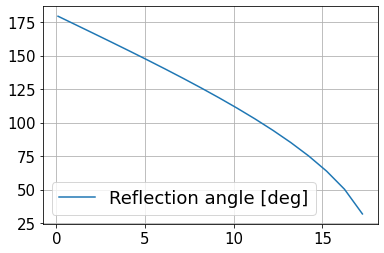

In [178]:
R1 = 63*cm
R2 = 511 # m

a = (R1 + R2) / 2.
b = np.linspace(0.1, 100, 100)
#print(b)
cos = calc_ellipseCos(a, b, R1, R2)

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.grid()
ax.plot( b, np.arccos(cos) * 180./np.pi, label='Reflection angle [deg]' )
ax.legend()

_b = 12.68
print(f'a={a}, b={_b}, R1={R1}, R2={R2}, theta={np.arccos(calc_ellipseCos(a, _b, R1, R2))*180./np.pi} deg')

_c = np.sqrt(a**2 - _b**2)
_e = _c/a
_K = -_e**2
_R = _b**2/a
_d1 = a - _c
_d2 = a + _c
_cospsi = -(R2**2-R1**2-4*_c**2)/(-4.*_c*R1)
_psi = np.arccos(_cospsi)
_sinpsi = np.sin(_psi)
print(f'eccentricity e={_e}, conic constant K={_K}, focal point x = {_c}, curvature R={_R}')
print(f'd1 = {_d1}, d2 = {_d2}')
print(f'psi = {_psi*180/np.pi} deg')

_y_shift = _d1*_sinpsi
_d1_new = _d1*_cospsi
print(f'y_shift = {_y_shift}')
print(f'd1_new = {_d1_new}')

## Check Elliptical reflector 320 degree light cone 

In [158]:
K = -0.605
e = np.sqrt( -K )
d1 = 100
d2 = 800
R = -177.778

_focal = (d2 - d1)/2.
_a = (d1 + d2) / 2.
_b = np.sqrt( _a**2 - _focal**2 )
_R = _b*_b / _a
print( f'a = {_a}, b = {_b}, R = b**2/a = {_R}')

a = 450.0, b = 282.842712474619, R = b**2/a = 177.77777777777777


In [180]:
def calc_ellipse_parameters(a=2.5, b=1.5, R1=1.0):
    R2 = 2*a - R1
    theta = np.arccos(calc_ellipseCos(a, b, R1, R2))

    c = np.sqrt(a**2 - b**2)
    e = c/a
    K = -e**2
    R = b**2/a
    d1 = a - c
    d2 = a + c
    cospsi = -(R2**2-R1**2-4*c**2)/(-4.*c*R1)
    psi = np.arccos(cospsi)
    sinpsi = np.sin(psi)

    print(f'a={a/mm} mm, b={b/mm} mm, R1={R1/mm} mm, R2={R2/mm} mm, theta={theta*180./np.pi} deg')
    print(f'eccentricity e={e}, conic constant K={K}, focal point x = {c/mm} mm, curvature R={R/mm} mm')
    print(f'd1 = {d1/mm} mm, d2 = {d2/mm} mm')
    print(f'psi = {psi*180/np.pi} deg')

    y_shift = d1*sinpsi
    d1_new = d1*cospsi
    print(f'y_shift = {y_shift/mm} mm')
    print(f'd1_new = {d1_new/mm} mm')
    
    mirror_y_shift = R1*sinpsi
    print(f'mirror_y_shift = {mirror_y_shift/mm} mm')
    
    par_dict = {}
    par_dict['a'] = a
    par_dict['b'] = b
    par_dict['R1'] = R1
    par_dict['R2'] = R2
    par_dict['theta'] = theta
    par_dict['c'] = c
    par_dict['e'] = e
    par_dict['K'] = K
    par_dict['R'] = R
    par_dict['d1'] = d1
    par_dict['d2'] = d2
    par_dict['cospsi'] = cospsi
    par_dict['sinpsi'] = sinpsi
    par_dict['psi'] = psi
    par_dict['y_shift'] = y_shift
    par_dict['d1_new'] = d1_new
    par_dict['mirror_y_shift'] = mirror_y_shift
    
    return par_dict

In [190]:
a=2.5
b=1.5
R1=1.0

ellips_par1 = calc_ellipse_parameters(a=a, b=b, R1=R1) 

a=2500.0 mm, b=1500.0 mm, R1=1000.0 mm, R2=4000.0 mm, theta=82.81924421854173 deg
eccentricity e=0.8, conic constant K=-0.6400000000000001, focal point x = 2000.0 mm, curvature R=900.0 mm
d1 = 500.0 mm, d2 = 4500.0 mm
psi = 97.18075578145829 deg
y_shift = 496.0783708246108 mm
d1_new = -62.5 mm
mirror_y_shift = 992.1567416492215 mm


In [198]:
# 第一焦点での beam waist を仮定して、反射後の第二焦点での beam waist を求める
_w0 = 5*mm
_wavelength = 1.5*mm

_R1 = ellips_par1['R1']
_R2 = ellips_par1['R2']

_w1 = calc_beamwaist(z=_R1, w0=_w0, wavelength=_wavelength) # before reflection
_w2 = _w1 # after reflection
_w0_2 = calc_beamwaist0(w=_w2, R=_R2, wavelength=_wavelength) # at beam waist after reflection
_z_2 = calc_waist_distance(w=_w2, R=_R2, wavelength=_wavelength) # at beam waist after reflection
_w3 = calc_beamwaist(z=_z_2-_R2, w0=_w0_2, wavelength=_wavelength) # at 2nd focal point

print(f'beam waist0 after reflection = {_w0_2/mm} mm')
print(f'beam waist0 position after reflection = {_z_2/mm} mm')
print(f'beam waist after reflection at 2nd focal point = {_w3/mm} mm')

beam waist0 after reflection = 19.55073878185563 mm
beam waist0 position after reflection = 3832.7929596594936 mm
beam waist after reflection at 2nd focal point = 19.97264067474222 mm


## Test

In [193]:
_w0 = 5*mm
_wavelength = 1.5*mm
_d = 100*mm
_R = calc_R(w0=_w0, z=_d, wavelength=_wavelength)
_w = calc_beamwaist(w0=_w0, z=_d, wavelength=_wavelength)
__w0 = calc_beamwaist0(w=_w, R=_R, wavelength=_wavelength)
__d = calc_waist_distance(w=_w, R=_R, wavelength=_wavelength)

print(f'_R = {_R/mm} mm, _w = {_w/mm} mm, __w0 = {__w0/mm} mm, __d = {__d/mm} mm')

_R = 127.41556778080378 mm, _w = 10.779103175965243 mm, __w0 = 5.0 mm, __d = 100.00000000000001 mm


In [197]:
# z=50mm
print(f'{calc_beamwaist(w0=_w0, z=50*mm, wavelength=_wavelength)/mm} mm')
print(f'{calc_R(w0=_w0, z=50*mm, wavelength=_wavelength)/mm} mm')
# z=100mm
print(f'{calc_beamwaist(w0=_w0, z=100*mm, wavelength=_wavelength)/mm} mm')
print(f'{calc_R(w0=_w0, z=100*mm, wavelength=_wavelength)/mm} mm')

6.913556705453858 mm
104.83113556160755 mm
10.779103175965243 mm
127.41556778080378 mm


In [199]:
print( calc_beamwaist0(w=11.81*mm, R=115.19*mm, wavelength=calc_wavelength(100*GHz))/mm, 'mm')

7.310193514078315 mm


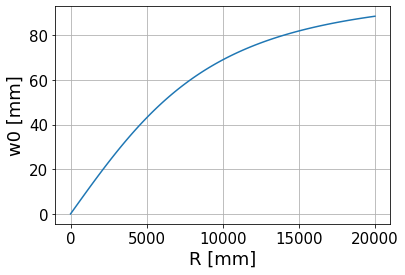

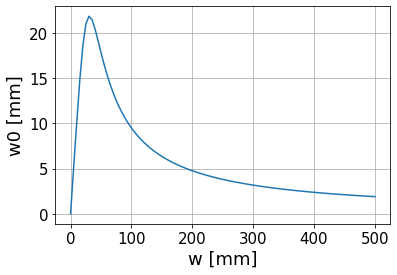

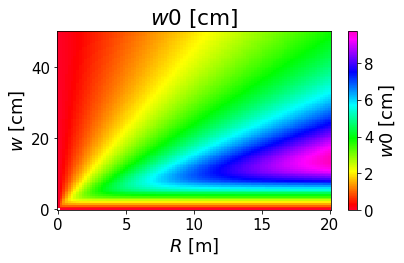

In [225]:
_wavelength = calc_wavelength( 100 * GHz )
_R = np.linspace(0., 20., 100)
_w = np.linspace(0., 500.*mm, 100)

_w0_vs_R = calc_beamwaist0(w=100*mm, R=_R, wavelength=_wavelength)
_w0_vs_w = calc_beamwaist0(w=_w, R=1, wavelength=_wavelength)

plt.plot(_R/mm, _w0_vs_R/mm)
plt.xlabel('R [mm]')
plt.ylabel('w0 [mm]')
plt.grid(True)
plt.show() 

plt.plot(_w/mm, _w0_vs_w/mm)
plt.xlabel('w [mm]')
plt.ylabel('w0 [mm]')
plt.grid(True)
plt.show() 



_X, _Y = np.meshgrid(_R, _w)
_w0 = calc_beamwaist0(R=_X, w=_Y, wavelength=_wavelength)

plt.pcolormesh(_X, _Y/cm, _w0/cm, cmap='gist_rainbow', vmin=0, vmax=None)
plt.xlabel('$R$ [m]')
plt.ylabel('$w$ [cm]')
plt.title('$w0$ [cm]')
plt.colorbar(orientation='vertical').set_label('$w0$ [cm]')
#plt.savefig('2D_w0.pdf')
plt.tight_layout()
plt.show()

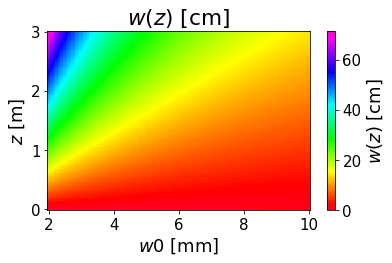

In [222]:
_wavelength = calc_wavelength( 200 * GHz )
_w0 = np.linspace(2.*mm, 10.*mm, 100)
_z = np.linspace(0., 3., 100)

_X, _Y = np.meshgrid(_w0, _z)
_w = calc_beamwaist(w0=_X, z=_Y, wavelength=_wavelength)

plt.pcolormesh(_X/mm, _Y, _w/cm, cmap='gist_rainbow', vmin=0, vmax=None)
plt.xlabel('$w0$ [mm]')
plt.ylabel('$z$ [m]')
plt.title('$w(z)$ [cm]')
plt.colorbar(orientation='vertical').set_label('$w(z)$ [cm]')
#plt.savefig('2D_w0.pdf')
plt.tight_layout()
plt.show()